In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

## El átomo de helio y la correlación electrónica

La clase pasada encontramos una función de onda variacional para el átomo de 
helio en su estado fundamental. Constriumos la función de onda mediante funciones propias del átomo de hidrógeno y un parametro variacional $ \zeta $. La función de onda  normalizada es: 

<center> $ \Psi_0(r1,r2) = \frac{1}{\pi}\zeta^3e^{-\zeta(r1+r2)} $

Utilizando el método variacional, determinamos que:

$ \zeta = 1.6875 $

En la siguiente celda se definen la función de onda variacional en cordenadas cartesianas:

In [ ]:
zeta = 1.6875

In [10]:
def r(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [11]:
def cart_1s(x1,y1,z1, x2,y2,z2,zeta):
    return (1/np.pi)*(zeta**3)*np.exp(-zeta*(r(x1,y1,z1)+r(x2,y2,z2)))

En el caso del hidrógeno determinamos que el máximo de la distribción de probabilidad se encuentra sobre el nucleo formando la cúspide electrón-núcleo. Lo que interesa al 
estudiar el átomo de helio, es el efecto del segundo electrón en la función de onda. 

Al calcular la energía de la función de onda variacional del helio, utlizamos el Hamiltoniano exacto:

<center> $ \hat{H} = -\frac{1}{2}\nabla_1 - \frac{1}{2}\nabla_2 - \frac{Z}{r_1} - \frac{Z}{r_2} + \frac{1}{r_{12}} $ </center>

Por lo tanto considermos la contribución a la energía de la energía cinética de los 
electrónes, la atracción coulombica núcleo-electrón, y la repulsión coulombica entre las
**distribuciones de carga** del electron 1 y el electron 2.

Lo que nos interesa en esté laboratorio es estudiar el efecto de un electron sobre el otro. Intuitivamente uno tiende a pensar que al fijar las coordenadas del electron 2 en algún punto en el espacio, la probabilidad de encontrar el electron 1 en las vecindades del electron 2 deberian disminuir. 

La función de onda del helio es una función de $ {\rm I\!R }^6 \rightarrow {\rm I\!R } $,
lo que hace imposible graficarla en toda su gloria y majestad. Por lo tanto para poder 
entender la física detras de la función de onda, vamos a graficar cortes a través de ella. Para eso vamos a fijar las coordenadas del electron 2  en (0.2,0.0,0.0) es decir a 0.2 bohr 
del núcleo en el eje X. 

In [21]:
x1 = np.linspace(-4,4,2000)
y1 = np.linspace(-4,4,2000)
z1 = 0.0
X1,Y1 = np.meshgrid(x1, y1)

x2 = 0.5
z2 = 0.0
y2 = 0.0

Vamos a definr una función que nos permita graficar superficies:

In [7]:
def plot_3D_cart(X,Y,z,x1,y1,z1,ze,func):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, func(X,Y,z,x1,y1,z1,ze), cmap=cm.coolwarm,
                              linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)


Ahora podemos visulizar la función de onda del helio con el electron 2 fijo en (0.2,0.0,0.0):

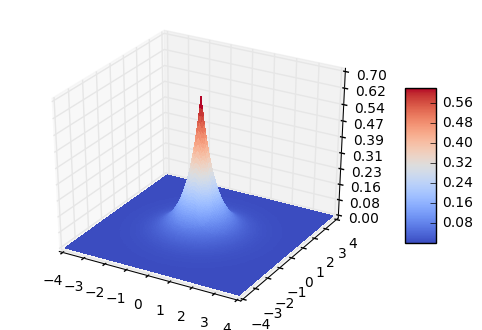

In [22]:
plot_3D_cart(X1,Y1,z1,x2,y2,z2,zeta,cart_1s)

Se puede apreciar que la función de onda no se ve afectada por la presencia del segundo electron, ya que es cualitativamente muy similar a la función de onda del hidrógeno con un 
con un electrón en el plano xy (Se puede verificar al cambiar la coordenada del electron 2 y graficar de nuevo). Sin embargo al mirar la expresión de la función de onda más detalladamente se puede observar que el valor no es afectado por la posición relativa de los electrones y solamente por sus posiciones con respecto al núcleo. 

Es por eso que una buena estratégia para construir una funcion de onda correlacionada, es 
incluir una tercera variable en la función de onda que es la distancia interelectrónica:

<center>$ \Psi = \Psi(r_1,r_2,r_{12}) $ 

¿Pero como se incluye la distancia interelectrónica en la función de onda?

En la funcón de onda exacta, la densidad de probabilidad deberia ser más grande cuando los electrones están 
alejados. Por lo tanto Hylleraas en 1929 propuso incluir la variable interelectrónica
en la función de onda como:

<center> $ \Psi(r_1,r_2,r_{12}) = Ne^{-\zeta(r_1+r_2)}(1 + br_{12}) $

Donde $ N $ es una constante de normalización y b un segundo parámetro variacional. Es evidente que al aumentar la distancia interelectrónica el valor de la función de onda aumenta. 

Un par de años más tarde logró construir una expansión general de la función de onda para un átomo de dos electrones en terminos de $ r_{12} $, $ r_1-r_2 $ y $ r_1 + r_2 $:

<center> $  \Psi(r_1,r_2,r_{12}) = \sum\limits_{klm}e^{-\zeta(r_1+r_2)}(r_1 + r_2)^k(r_1 - r_2)^l r_{12}^m $ 

Por ejemplo, la función de onda:
\begin{equation*}
 \Psi(r_1,r_2,r_{12}) = Ne^{-\zeta(r_1+r_2)}(1+ c_1(r_1 - r_2)^2 + c_2r_{12})
\end{equation*}

 $ N = 1.330839 $
 
 $ c_1 = 0.130815 $
 
 $ c_2 = 0.291786 $ 
 
 $ \zeta = -1.81607 $.
 
Esta humilde función de onda da una energía de E =  2.902431 E$_h$, lo que está 
a 1.3 mE$_h$ del valor exacto no relativístico. 



Su misión hoy día es la siguiente: 

1) Grafique la función de onda de Hylaraas en el plano xy con un
electrón  fijo en el núcleo. ¿Ve alguna diferencia en la función de onda con respecto a 
la función de onda referencial? ¿Que puede inferir sobre la importancia de incluir la 
correlación explicita?

2) Para poder investigar en más detalle el efecto de la correlación explícita, conviene 
obtener la función de onda de correlación que esta definida como:

<center> $ \Psi_{corr} = \Psi_{exact} - \Psi_{ref} $

En nuestro caso $ \Psi_{exact} $ es la función de onda Hylleraas. 
Gráfique  $ \Psi_{corr} $ en el plano $xy$ y a lo largo del eje $x$, a diferentes distancias interelectrónicas, desde $r_{12} = 0.0a_0 $ hasta $r_{12} = 1.5a_0 $ en incrementos 
de $0.25a_0$. Describa como se comporta la correlación electrónica, a medida que el 
electron fijo se aleja del núcleo.

In [67]:
def r(x,y,z):
    return np.sqrt(x**2+y**2+z**2)

In [68]:
zeta_H = -1.81607

In [82]:
def r12(x1,y1,z1,x2,y2,z2):
    return(np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2))

In [98]:
def psi_H(x1,y1,z1, x2,y2,z2, zeta_H): 
    c1 = 0.130815
    c2 = 0.291786
    return( 1.330839*np.exp(zeta_H*(r(x1,y1,z1)+r(x2,y2,z2)))*((1 + c1*(r(x1,y1,z1)-r(x2,y2,z2))**2) +c2*r12(x1,y1,z1,x2,y2,z2)))

In [99]:
x1 = np.linspace(-4,4,2000)
y1 = np.linspace(-4,4,2000)
z1 = 0.0
X1,Y1 = np.meshgrid(x1, y1)

x2 = 0.5
z2 = 0.0
y2 = 0.0

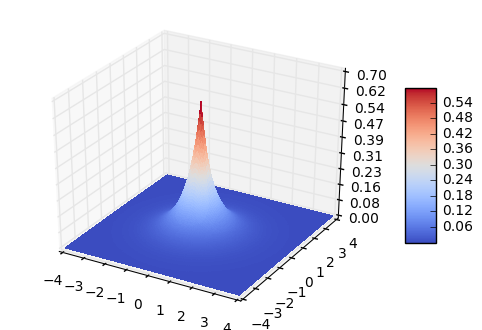

In [100]:
plot_3D_cart(X1,Y1,z1,x2,y2,z2,zeta_H,psi_H)

In [179]:
def cor_e(x1,y1,z1, x2,y2,z2, zeta_H, zeta):
    return(psi_H(x1,y1,z1, x2,y2,z2, zeta_H) - cart_1s(x1,y1,z1, x2,y2,z2,zeta))

In [185]:
x1 = np.linspace(-4,4,2000)
y1 = np.linspace(-4,4,2000)
z1 = 0.0
X1,Y1 = np.meshgrid(x1, y1)

x2 = 0.0
z2 = 0.0
y2 = 0.0

In [186]:
def plot_3D_cor_e(X,Y,z,x1,y1,z1,ze,zeta_H,func):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, func(X,Y,z,x1,y1,z1,ze,zeta_H), cmap=cm.coolwarm,
                              linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)


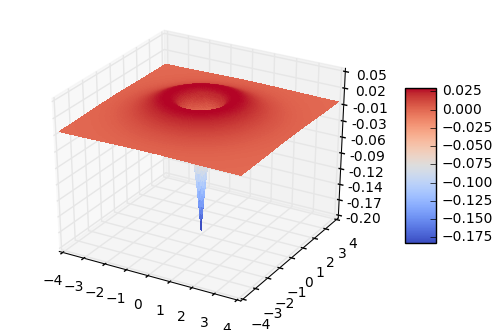

In [187]:
plot_3D_cor_e(X1,Y1,z1,x2,y2,z2,zeta_H,zeta,cor_e)

In [183]:
def plot_func_1D(cor_e):
    x1 = np.linspace(-4,4,2000)
    y1 = 0.0
    z1 = 0.0
    x2 = 0.25
    y2 = 0.0
    z2 = 0.0
    plt.plot(x1, cor_e(x1,y1,z1,x2,y2,z2,zeta_H,zeta))
    plt.xlabel("X/a_0")
    plt.ylabel("Psi_corr")
    plt.show()

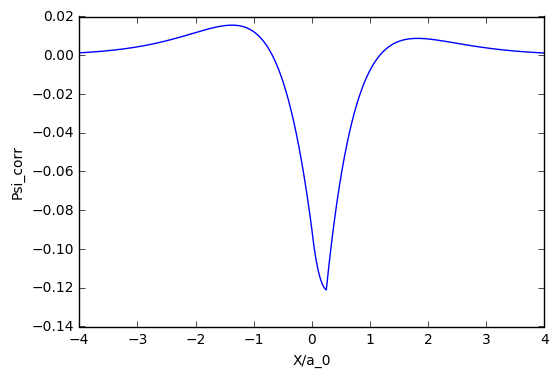

In [184]:
plot_func_1D(cor_e)